### After understanding the Intution part about Decision Tree Let's understand the implementation part of Decision Tree

**Import Required Libraries**

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns

Load the dataset `'health_lifestyle_dataset.csv'` using pandas

In [101]:
df = pd.read_csv("health_lifestyle_dataset.csv")

**View top 5 rows of the dataset.**

In [102]:
df.head()

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null  int64  
dtypes: 

**Check for total null values present in our dataset**

In [104]:
df.describe()

,id,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,48.525990,29.024790,10479.87029,6.491784,2.751496,2603.341200,0.200940,0.300020,74.457420,134.58063,89.508850,224.300630,0.299150,0.248210
std,28867.657797,17.886768,6.352666,5483.63236,2.021922,1.297338,807.288563,0.400705,0.458269,14.423715,25.95153,17.347041,43.327749,0.457888,0.431976
min,1.000000,18.000000,18.000000,1000.00000,3.000000,0.500000,1200.000000,0.000000,0.000000,50.000000,90.00000,60.000000,150.000000,0.000000,0.000000
25%,25000.750000,33.000000,23.500000,5729.00000,4.700000,1.600000,1906.000000,0.000000,0.000000,62.000000,112.00000,74.000000,187.000000,0.000000,0.000000
50%,50000.500000,48.000000,29.000000,10468.00000,6.500000,2.800000,2603.000000,0.000000,0.000000,74.000000,135.00000,89.000000,224.000000,0.000000,0.000000
75%,75000.250000,64.000000,34.500000,15229.00000,8.200000,3.900000,3299.000000,0.000000,1.000000,87.000000,157.00000,105.000000,262.000000,1.000000,0.000000
max,100000.000000,79.000000,40.000000,19999.00000,10.000000,5.000000,3999.000000,1.000000,1.000000,99.000000,179.00000,119.000000,299.000000,1.000000,1.000000


In [105]:
df.isnull().sum()

,0
id,0
age,0
gender,0
bmi,0
daily_steps,0
sleep_hours,0
water_intake_l,0
calories_consumed,0
smoker,0
alcohol,0


**Now we have a column named as `gender` and this column consist of 'male' and 'female' which is of string datatype so we need to encode this in `0` and `1` for this we will use `LabelEncoder` from `sklearn.preprocessing`**

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

Now, let’s divide our dataset into two parts:

**X → Independent variables (features) – the inputs used to make predictions.**

**y → Dependent variable (target) – the output we want to predict.**

In [107]:
X = df.drop(['disease_risk', 'id', 'cholesterol', 'gender', 'daily_steps', 'sleep_hours', 'water_intake_l', 'calories_consumed'], axis = 1)
y = df['disease_risk']

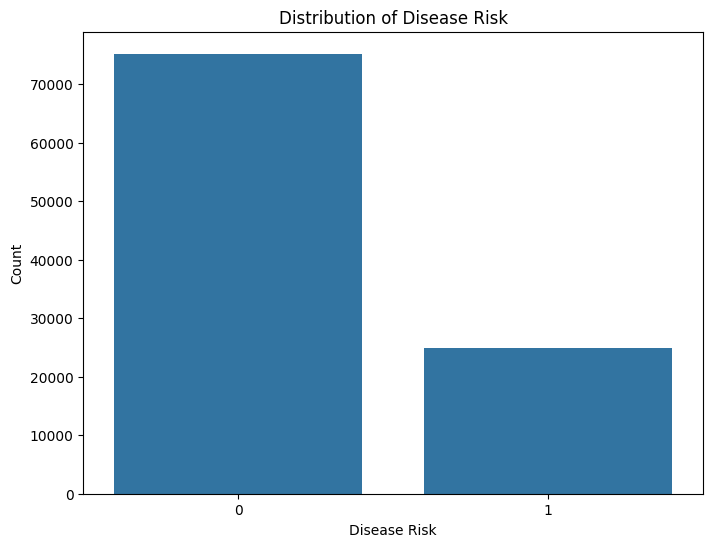

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='disease_risk', data=df)
plt.title('Distribution of Disease Risk')
plt.xlabel('Disease Risk')
plt.ylabel('Count')
plt.show()

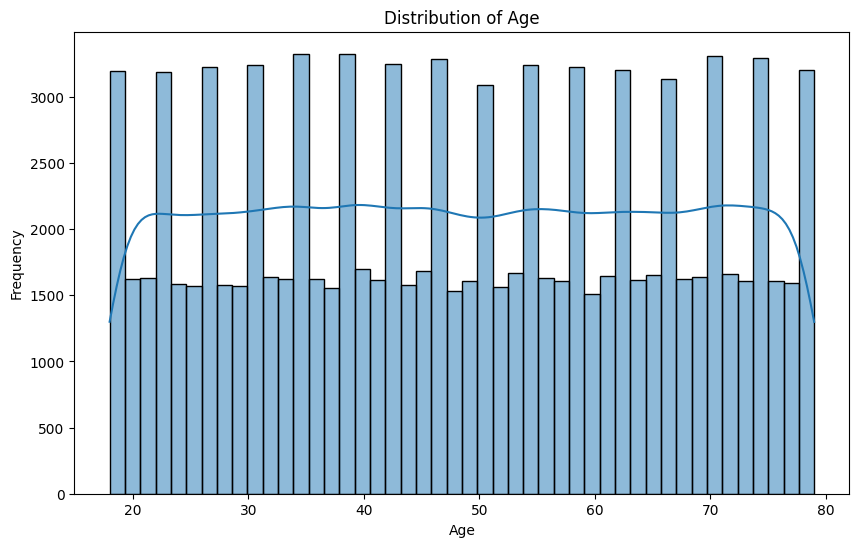

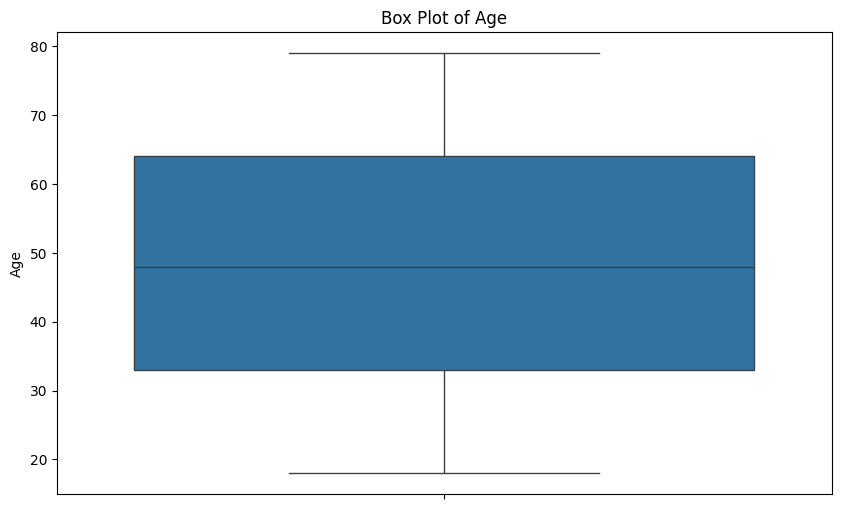

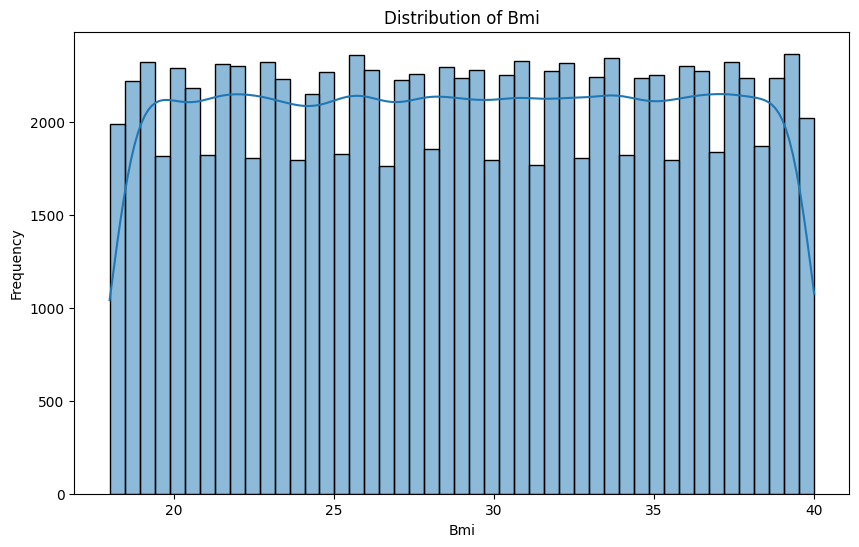

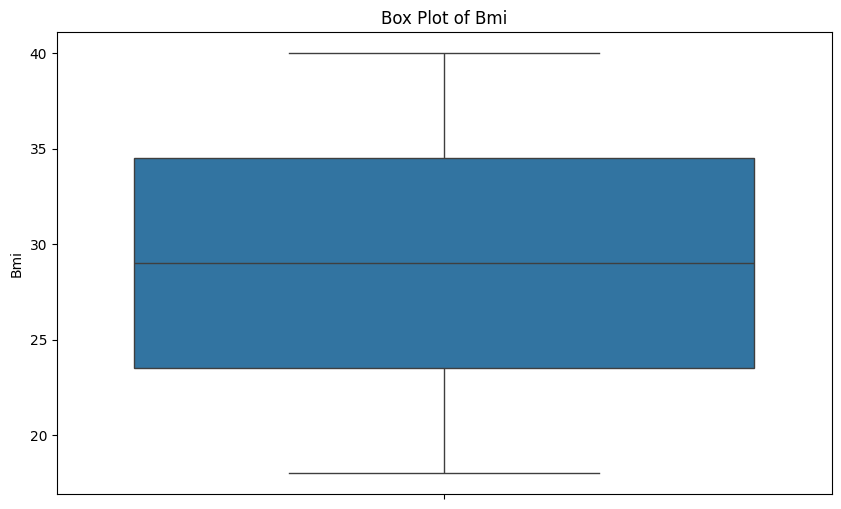

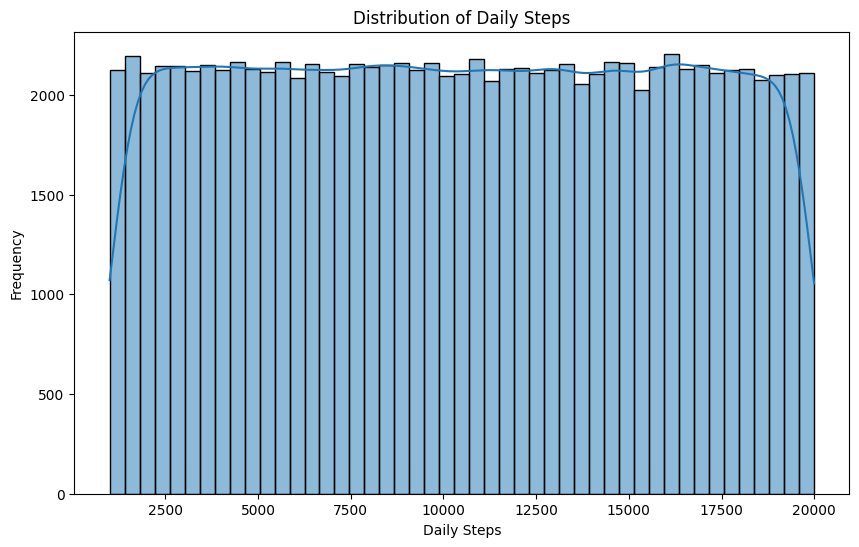

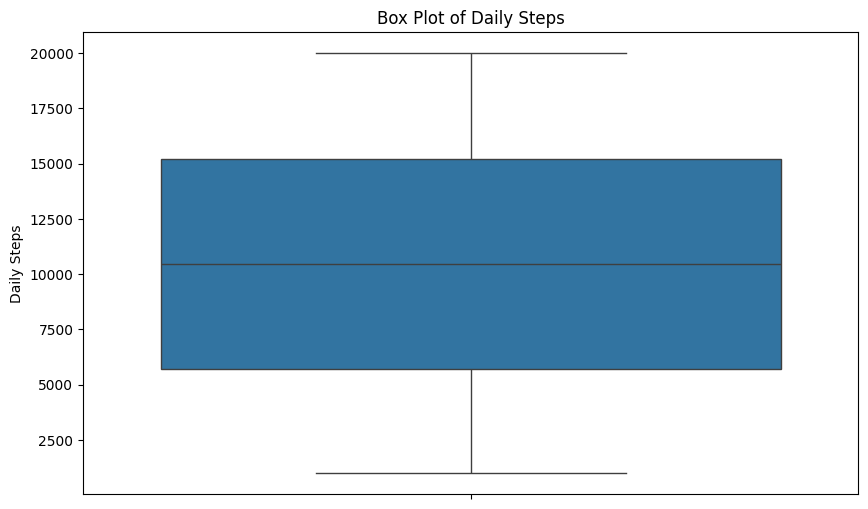

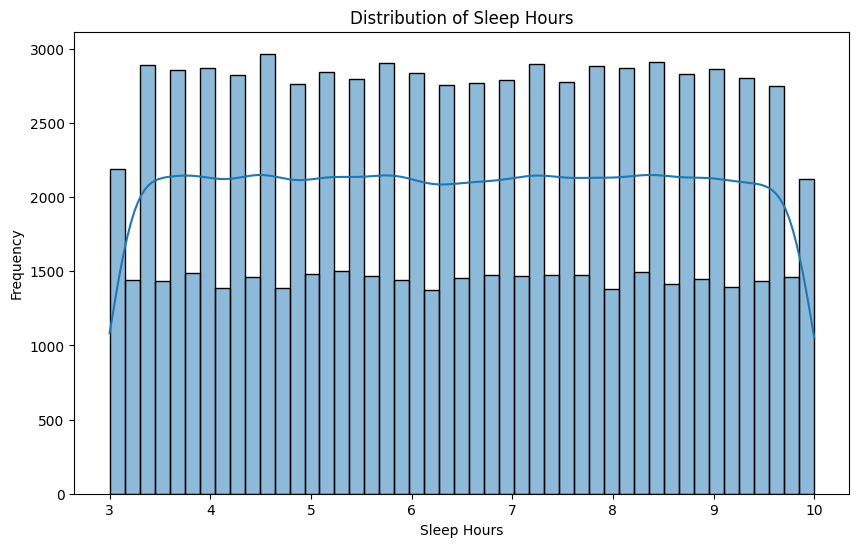

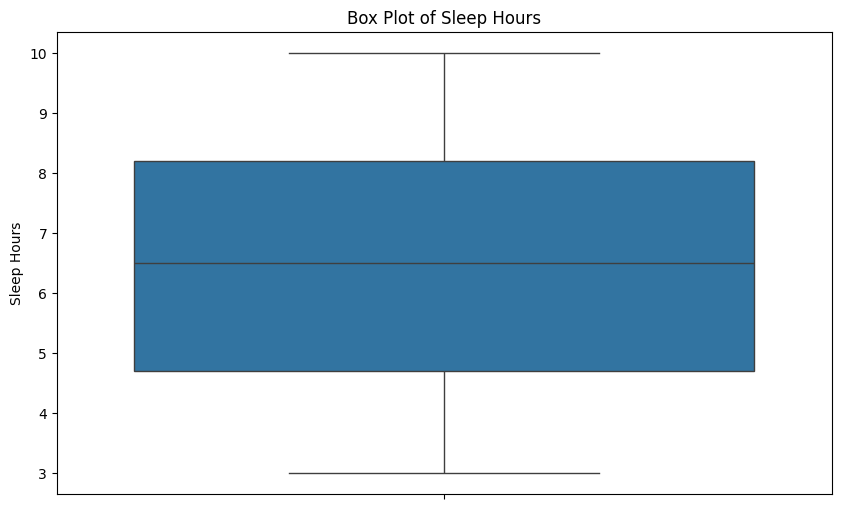

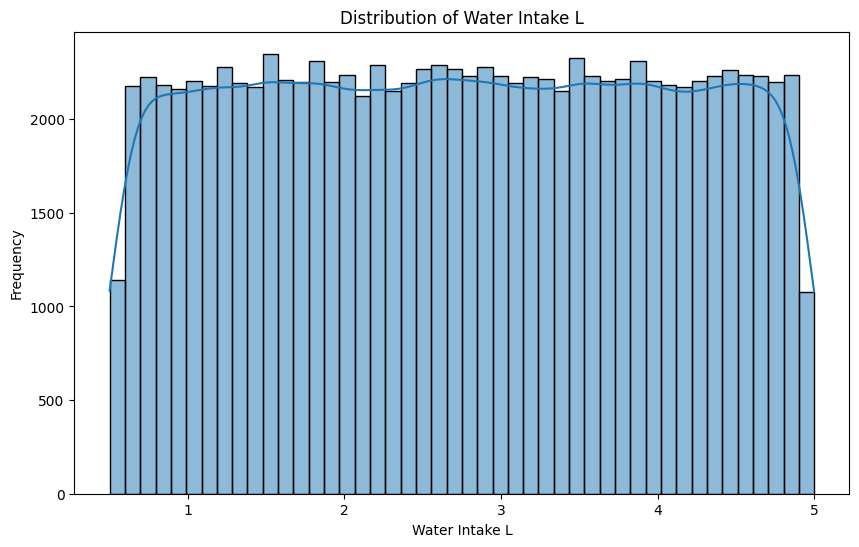

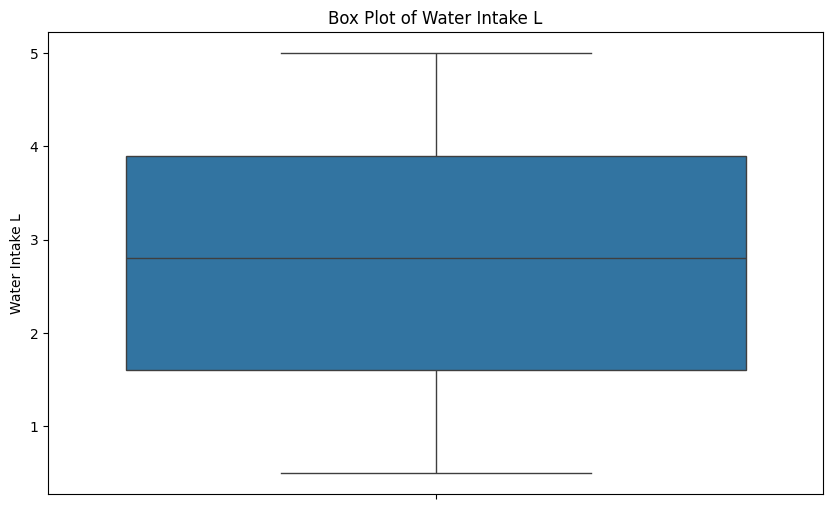

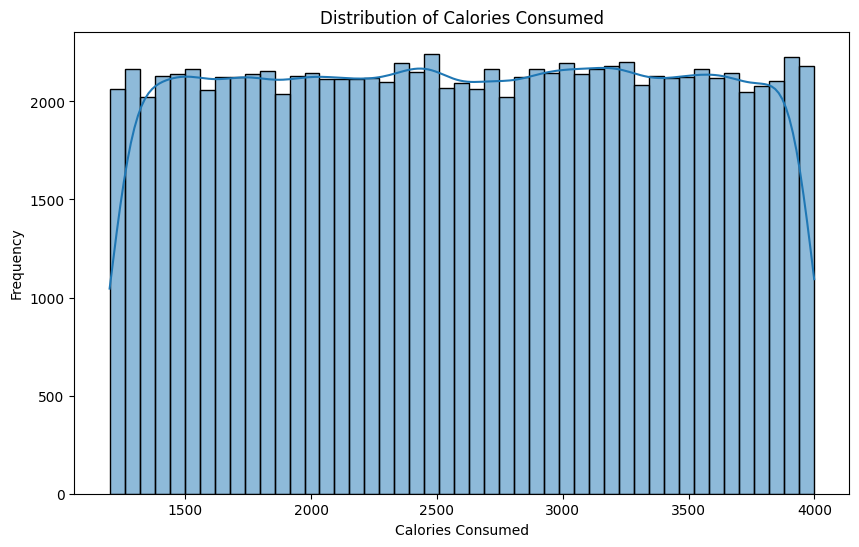

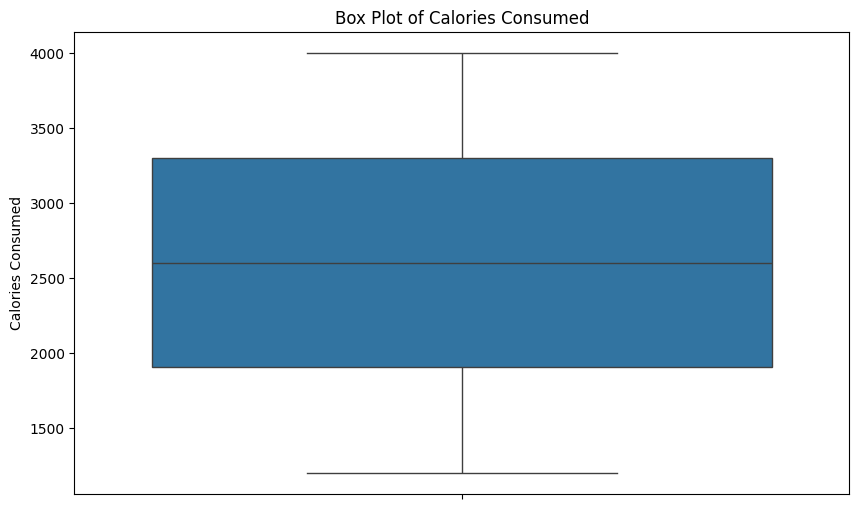

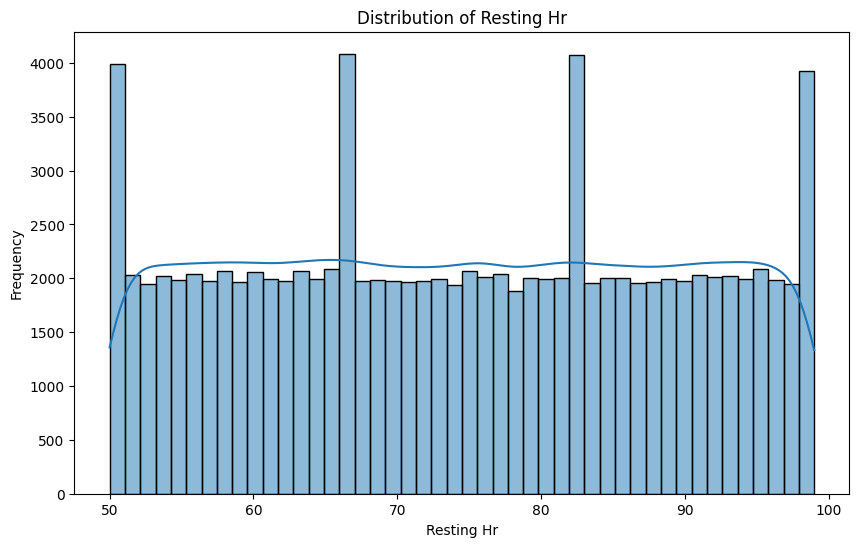

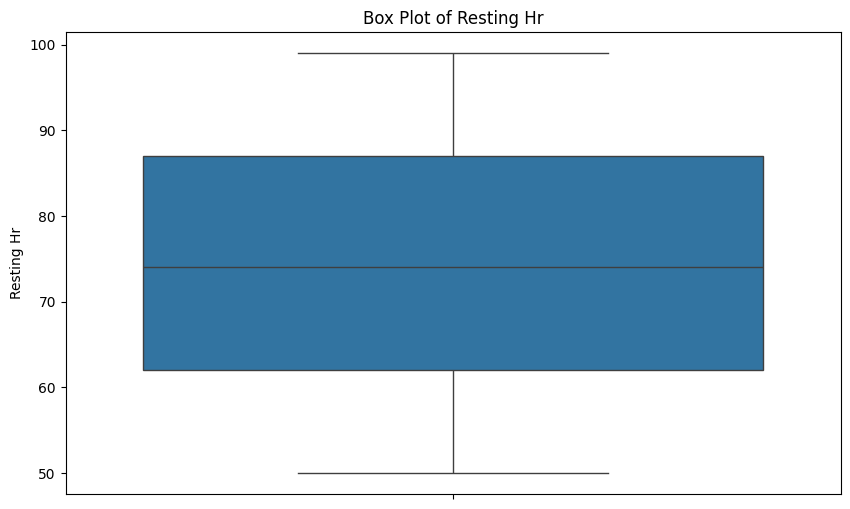

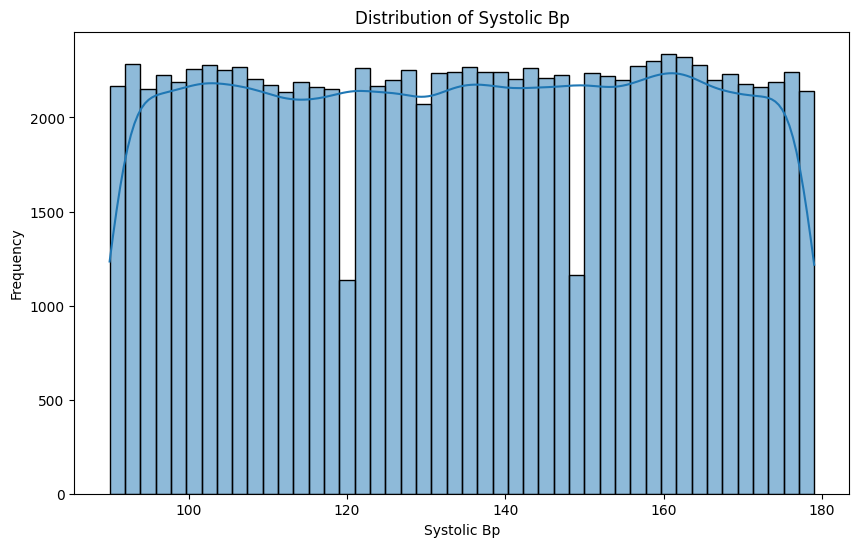

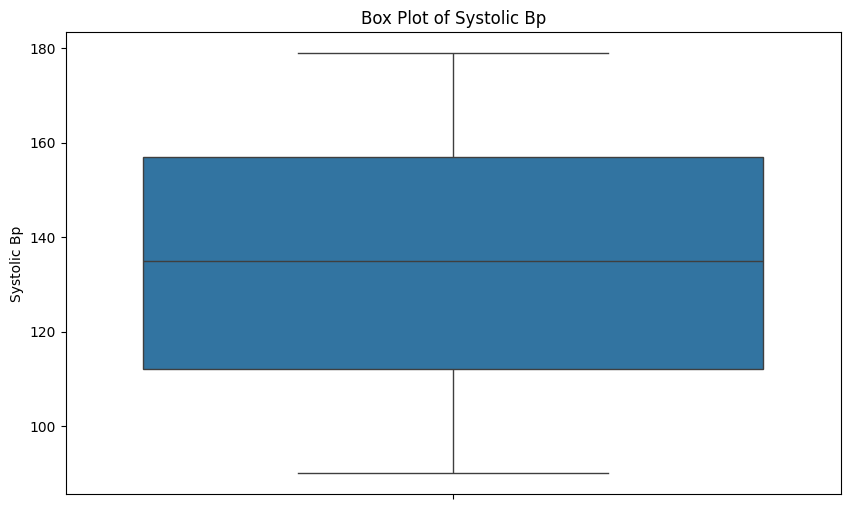

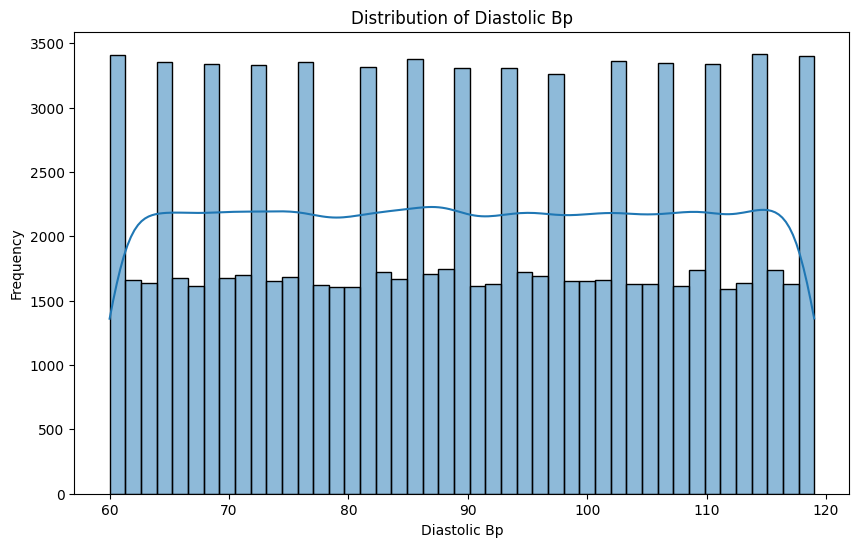

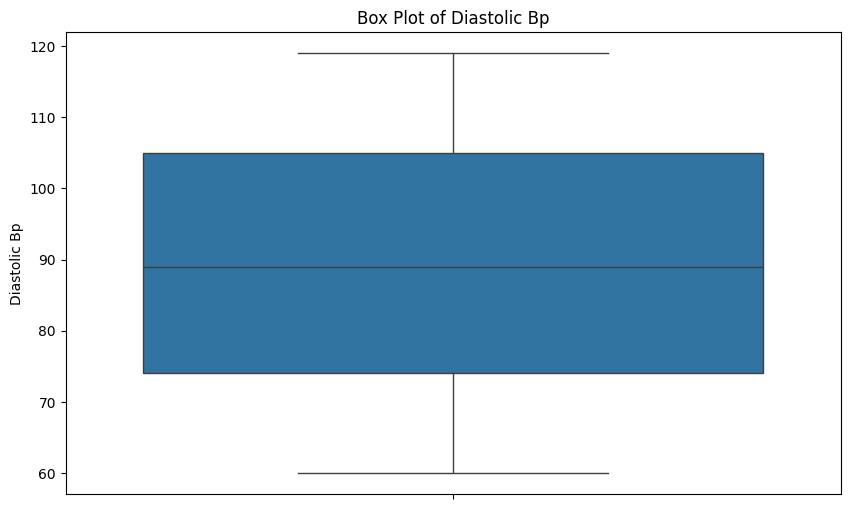

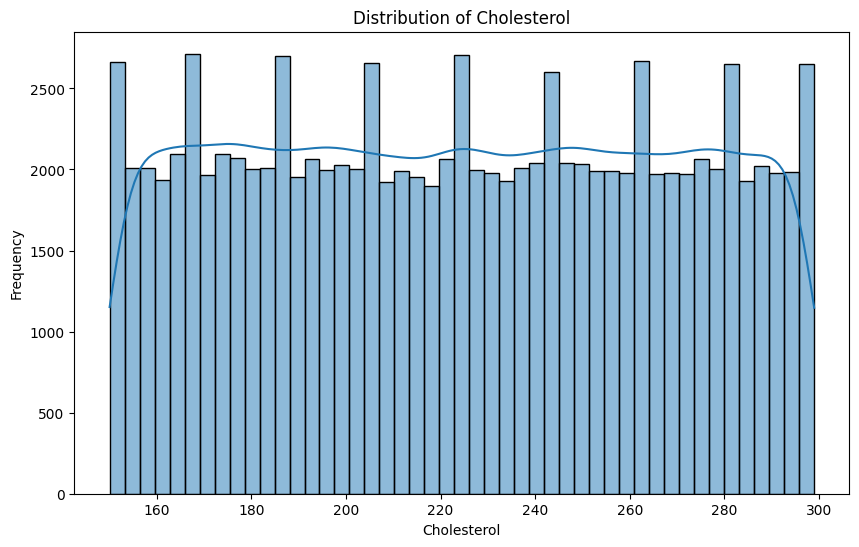

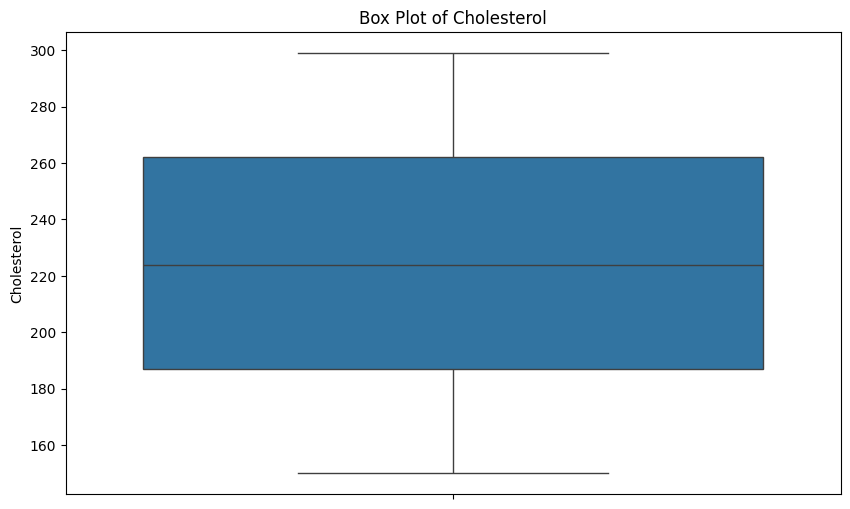

In [109]:
numerical_features = ['age', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l', 'calories_consumed', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol']

for feature in numerical_features:
    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.show()

    # Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature.replace("_", " ").title()}')
    plt.ylabel(feature.replace("_", " ").title())
    plt.show()

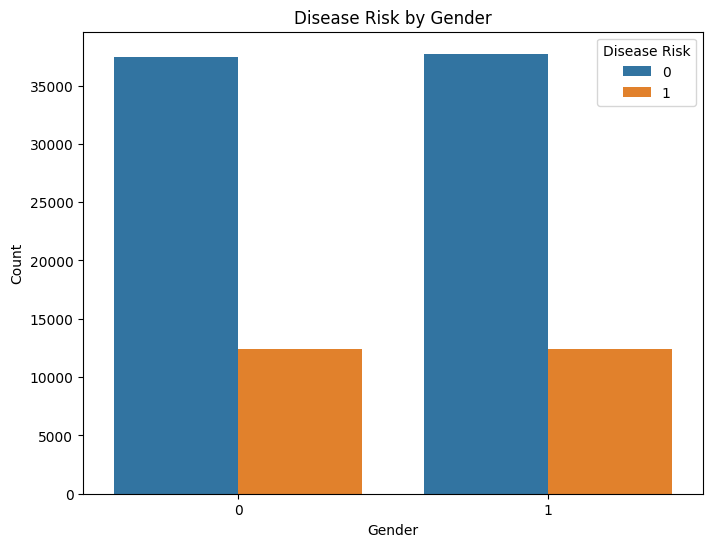

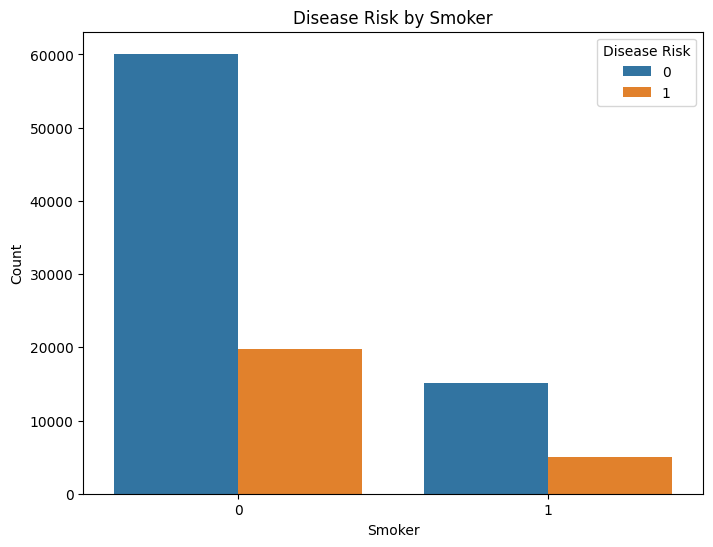

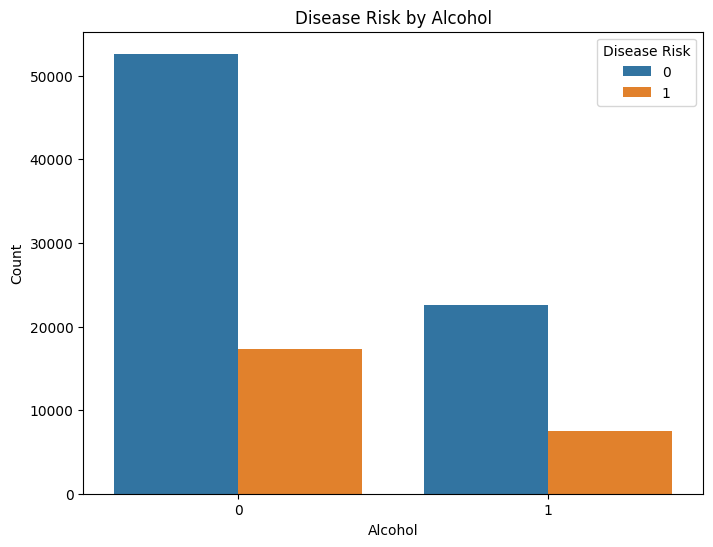

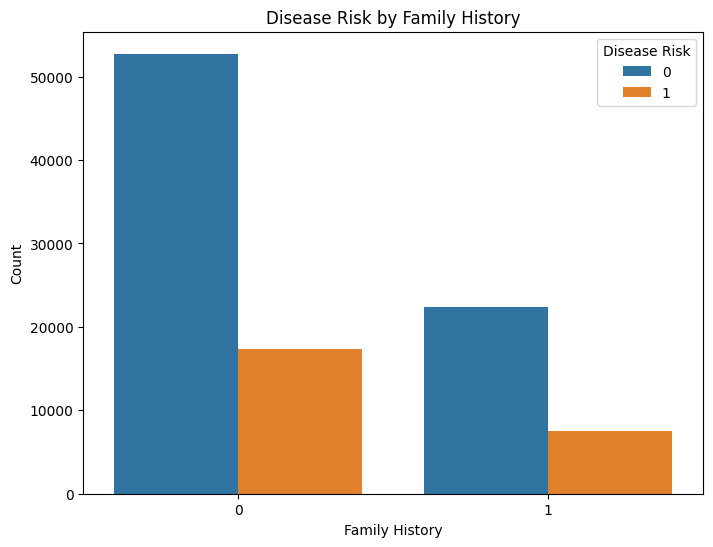

In [110]:
categorical_features = ['gender', 'smoker', 'alcohol', 'family_history']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='disease_risk', data=df)
    plt.title(f'Disease Risk by {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Count')
    plt.legend(title='Disease Risk')
    plt.show()

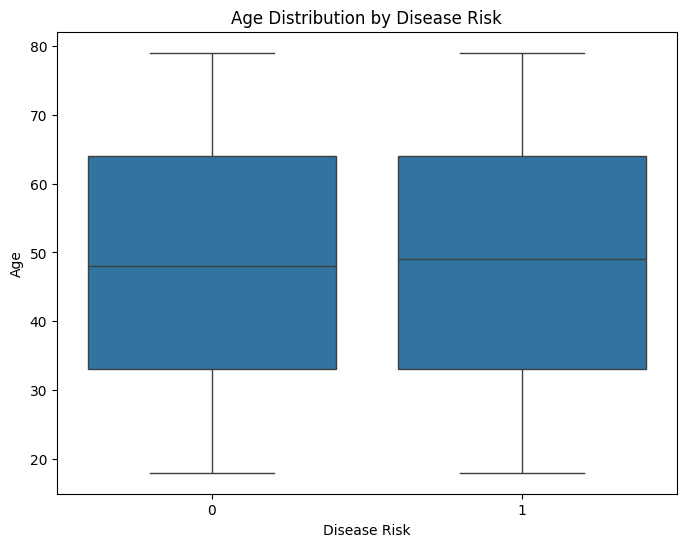

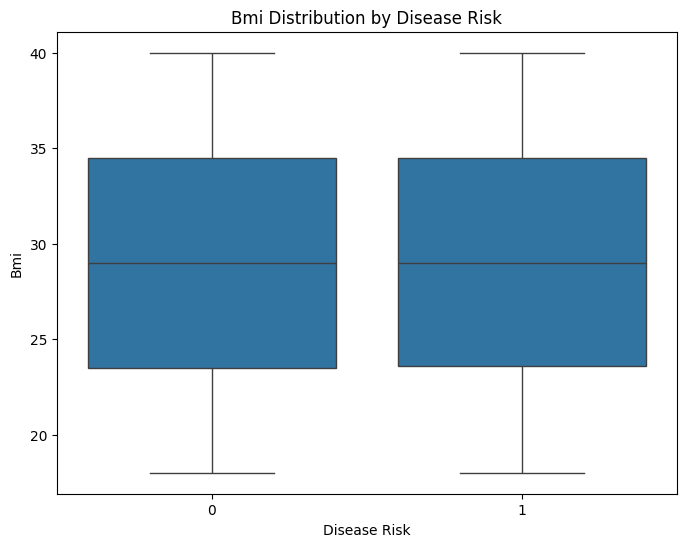

In [111]:
numerical_features_target = ['age', 'bmi']

for feature in numerical_features_target:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='disease_risk', y=feature, data=df)
    plt.title(f'{feature.replace("_", " ").title()} Distribution by Disease Risk')
    plt.xlabel('Disease Risk')
    plt.ylabel(feature.replace("_", " ").title())
    plt.show()

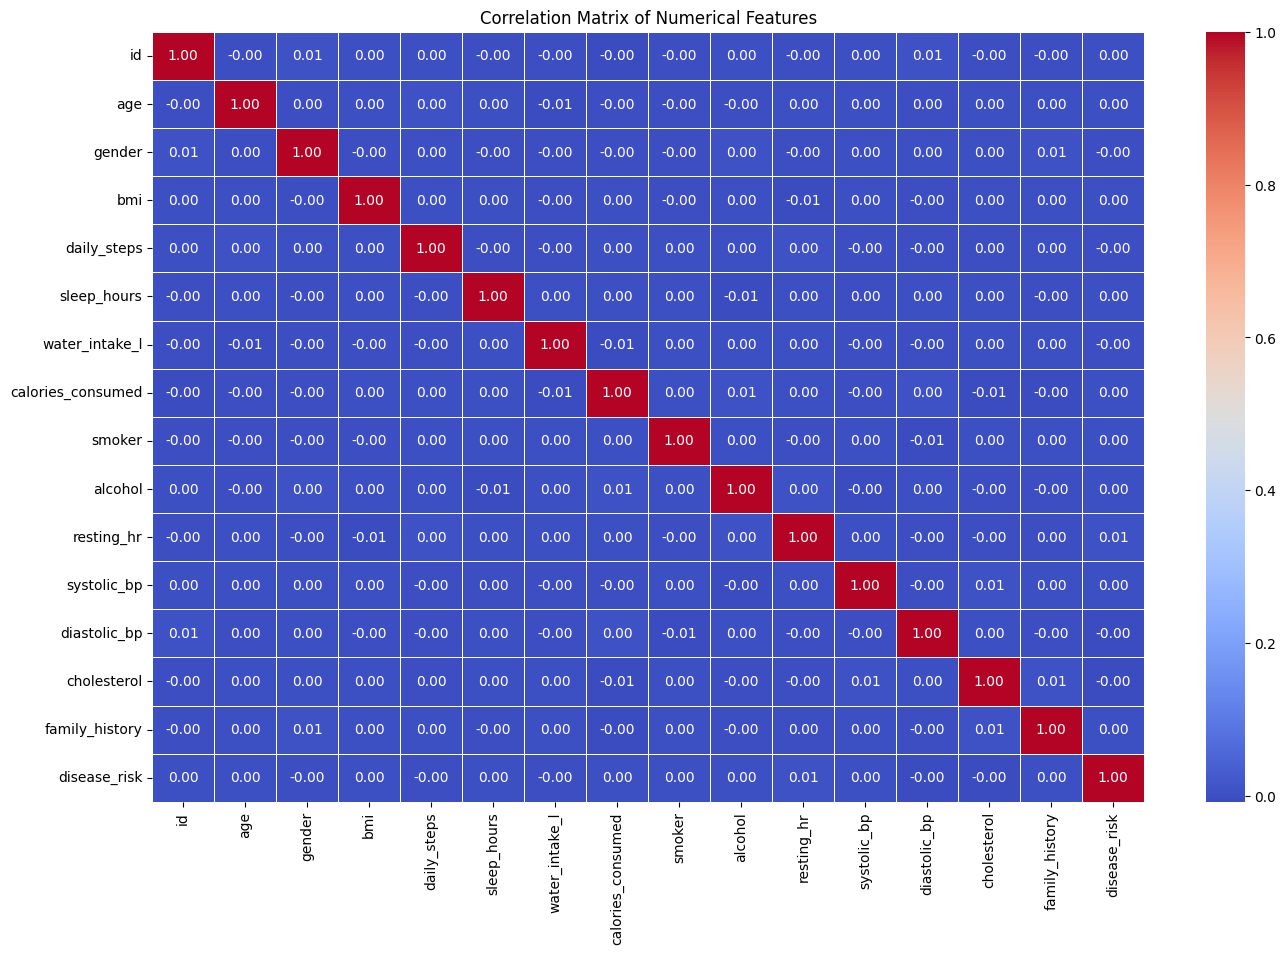

In [122]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Once we have separated the dataset into X (features) and y (target), the next step is to split the data into training and testing sets, and then use the training set to fit (train) our model.**

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**We initialize a Decision Tree Classifier with entropy as the criterion, a maximum depth of 3, and default values for min_samples_leaf and min_samples_split, while fixing random_state=42 for reproducibility.**

In [114]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

**As we have successfully created our model now it's time for training X_train and y_train**

In [115]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

**After training it's time for making prediciton on our decision tree model**

In [116]:
y_pred = dt.predict(X_test)

**After making predicition we have to check how good our model is performing after making prediction**

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.615030303030303

### Use RandomizedSearchCV to test a fixed number of random hyperparameter combinations for a Decision Tree with cross-validation, selecting the best set based on accuracy.
### It then trains the optimal model, makes predictions on the test data, and prints the best parameters along with the model’s accuracy.

In [118]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'max_depth' :[3,5,7,9,None],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'criterion' : ['gini','entropy']
}

In [119]:
rand_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=50,
    cv = 5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 9, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [120]:
print("best parameters",rand_search.best_params_)
best_dt = rand_search.best_estimator_

best parameters {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'criterion': 'gini'}


In [121]:
y_pred = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7505454545454545
